# Data Science - Proyecto 1


## Importamos Librerías.

In [1]:
# Setup Package Requirements
# install.packages(c("psych", "corrplot", "polycor"))
library(psych)
library(corrplot)
library(polycor)

# Set working environmen to file directory
# setwd("./Proyecto-1-Topicos-Avanzados-Estadistica")

corrplot 0.84 loaded


Attaching package: ‘polycor’


The following object is masked from ‘package:psych’:

    polyserial




## Importamos los datos.

In [2]:
# Data Input
encuestas <- read.csv2("./Proyecto-1-Topicos-Avanzados-Estadistica/encuestas.csv", sep = ";", header = T, encoding = "latin1", na.strings = "")
#Remover filas sin dato alguno
encuestas <- encuestas[rowSums(is.na(encuestas))!= ncol(encuestas), ]
encuestas

faltantes <- lapply(encuestas, function(x) sum(is.na(x)))
faltantes <- as.data.frame(faltantes[faltantes != 0])
faltantes

,ID,Fecha_noviembre,Hora_militar,Estacion,Troncal,Genero,Rechazos,X1_Satisf_General,X2.1_precio_pasaje,X2.2_comodidad,⋯,X7_dias_por_Semana,X8.1_antiguedad_uso_meses,X8.2_hora_habitual_viaje,X8.5_duracion_viaje_mins,X9_medio_de_acceso,X10_ocupacion,X11_grado_educativo,X12_rango_ingresos,X13_rango_edad,X14_estrato
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,8,5:20,CAN,26,1,0,2,1,-1,⋯,0,0,1,20,1,1,2,3,2,4
2,2,8,5:35,CAN,26,0,0,3,-1,-1,⋯,0,24,1,20,1,1,1,2,2,4
3,3,8,8:07,Portal Norte,Norte,1,3,1,-1,-1,⋯,0,36,1,90,1,3,2,2,3,3
4,4,8,8:13,Portal Norte,Norte,1,2,1,1,-1,⋯,0,12,1,50,1,1,2,1,2,3
5,5,8,6:51,Portal Norte,Norte,1,0,1,1,-1,⋯,0,0,0,70,1,3,2,4,4,2
6,6,8,7:32,Portal Norte,Norte,1,2,4,-1,1,⋯,1,8,1,20,1,3,5,6,3,3
7,7,8,7:01,Portal Norte,Norte,0,0,2,1,-1,⋯,1,120,1,90,1,3,2,2,2,2
8,8,8,7:52,Portal Norte,Norte,0,2,3,-1,-1,⋯,0,48,1,60,5,1,2,1,2,4
9,9,8,7:16,Portal Norte,Norte,0,0,3,1,-1,⋯,1,180,1,60,1,3,5,4,3,5


X3_precio_alto,X3.1_que_mejorar,X3.2.1_wifi,X3.2.3_servicio_comida,X3.2.6_zonas_de_descanso,X4.2_limpieza_cerca_estacion,X4.6_seguridad_en_estaciones,X4.8_conocimiento_informacion_personal,X4.9_amabilidad_informacion,X4.10_piso_estaciones,⋯,X6_dias_por_Semana,X7_dias_por_Semana,X8.1_antiguedad_uso_meses,X8.2_hora_habitual_viaje,X9_medio_de_acceso,X10_ocupacion,X11_grado_educativo,X12_rango_ingresos,X13_rango_edad,X14_estrato
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,58,1,2,3,2,1,4,4,2,⋯,3,3,54,37,3,4,5,24,7,11


## Filtrado de variables innecesarias

In [3]:
comentarios <- c("X3.1_que_mejorar")
datum <- c('ID','Fecha_noviembre','Hora_militar','Estacion','Troncal', 'Genero', 'Rechazos')
sujeto <- c('X1_.4_veces_mes','X1_dia_por_Semana','X2_dias_por_Semana',
'X3_dias_por_Semana','X4_dias_por_Semana','X5_dias_por_Semana','X6_dias_por_Semana','X7_dias_por_Semana',
'X8.1_antiguedad_uso_meses','X8.2_hora_habitual_viaje','X8.5_duracion_viaje_mins','X9_medio_de_acceso','X10_ocupacion',
'X11_grado_educativo','X12_rango_ingresos','X13_rango_edad','X14_estrato') 

cols_interesantes <- encuestas[! colnames(encuestas) %in% c(sujeto, datum, comentarios)]
head(cols_interesantes)

,X1_Satisf_General,X2.1_precio_pasaje,X2.2_comodidad,X2.3_seguridad,X2.4_frecuencia,X2.5_limpieza,X2.6_rapidez,X2.7_personal,X2.8_cobertura,X2.9_infraestructura,⋯,X5.10_sillas_comodas,X5.11_tiempo_parada,X5.12_tiempo_semaforos,X5.13_estado_buses,X5.14_trasbordos,X5.15_info_aplicaciones,X5.16_atencion_reclamos,X5.17_cantidad_paradas,X5.18_vendedores_ambulantes,menos_1_vez_mes
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,1,-1,-1,-1,-1,0,0,-1,-1,⋯,-1,1,1,-1,-1,0,0,1,-1,0
2,3,-1,-1,-1,-1,1,1,1,1,-1,⋯,-1,-1,-1,-1,-1,1,0,1,-1,0
3,1,-1,-1,-1,1,1,1,1,1,1,⋯,-1,1,-1,1,-1,-1,1,1,1,0
4,1,1,-1,-1,-1,-1,1,-1,1,1,⋯,-1,1,-1,1,-1,-1,1,1,-1,0
5,1,1,-1,-1,-1,1,-1,1,1,1,⋯,1,1,1,1,1,0,0,1,-1,0
6,4,-1,1,1,1,1,1,1,1,1,⋯,1,-1,-1,-1,-1,0,0,1,-1,0


## Imputación de Datos

In [4]:
#Función para la moda
Mode <- function(x, na.rm = FALSE) {
  if(na.rm){
    x = x[!is.na(x)]
  }

  ux <- unique(x)
  return(ux[which.max(tabulate(match(x, ux)))])
}
# Imputacion de datos 
cols_interesantes <- data.frame(
    sapply(
        cols_interesantes,
        function(x) ifelse(is.na(x),
           Mode(x, na.rm = TRUE),
            x)))

cols_interesantes <- as.data.frame(lapply(cols_interesantes, ordered))
cols_interesantes

X1_Satisf_General,X2.1_precio_pasaje,X2.2_comodidad,X2.3_seguridad,X2.4_frecuencia,X2.5_limpieza,X2.6_rapidez,X2.7_personal,X2.8_cobertura,X2.9_infraestructura,⋯,X5.10_sillas_comodas,X5.11_tiempo_parada,X5.12_tiempo_semaforos,X5.13_estado_buses,X5.14_trasbordos,X5.15_info_aplicaciones,X5.16_atencion_reclamos,X5.17_cantidad_paradas,X5.18_vendedores_ambulantes,menos_1_vez_mes
<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,⋯,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>
2,1,-1,-1,-1,-1,0,0,-1,-1,⋯,-1,1,1,-1,-1,0,0,1,-1,0
3,-1,-1,-1,-1,1,1,1,1,-1,⋯,-1,-1,-1,-1,-1,1,0,1,-1,0
1,-1,-1,-1,1,1,1,1,1,1,⋯,-1,1,-1,1,-1,-1,1,1,1,0
1,1,-1,-1,-1,-1,1,-1,1,1,⋯,-1,1,-1,1,-1,-1,1,1,-1,0
1,1,-1,-1,-1,1,-1,1,1,1,⋯,1,1,1,1,1,0,0,1,-1,0
4,-1,1,1,1,1,1,1,1,1,⋯,1,-1,-1,-1,-1,0,0,1,-1,0
2,1,-1,-1,-1,1,1,-1,-1,1,⋯,1,1,1,1,1,1,-1,1,1,0
3,-1,-1,-1,-1,-1,1,-1,1,-1,⋯,-1,-1,-1,-1,-1,-1,0,-1,1,0
3,1,-1,-1,-1,-1,1,-1,1,0,⋯,1,1,-1,-1,1,0,-1,1,-1,0


## Agrupación

Decidimos a criterio educado las mejores agrupaciones de las variables disponibles. Luego efectuaremos PCA sobre cada tabla subconjunto de los datos originales.

In [5]:
general <- c('X1_Satisf_General')

equipamiento_cols <- c('X3.2.6_zonas_de_descanso','X3.2.4_baños',
                      'X3.2.2_cicloparqueaderos', 'X3.2.1_wifi', 
                      'X3.2.3_servicio_comida')
                    
informacion <- c('X5.4_info_mapas','X5.7_senalizacion_estaciones', 'X2.10_informacion',
                      'X5.15_info_aplicaciones', 'X4.5_amabilidad_taquillas' , 'X4.9_amabilidad_informacion', 'X2.7_personal', 
                        'X4.8_conocimiento_informacion_personal', 'X3.2.5_dispositivos_informacion', 'X5.8_tablero_frecuencias')

infraestructura <- c('X2.8_cobertura', 'X5.13_estado_buses','X5.5_respetan_fila_abordar',
                     'X5.1_recarga_tarjeta','X5.2_ubicacion_estaciones', 
                     'X4.11_puertas_estaciones', 'X2.9_infraestructura', 'X4.12_calzadas_de_buses'
                      )

tiempo_sistema <- c('X5.12_tiempo_semaforos', 'X2.6_rapidez','X5.11_tiempo_parada', 'X5.14_trasbordos',
                      'X4.4_agilidad_taquillas', 'X5.6_espera_de_bus_corta', 'X5.17_cantidad_paradas')

comodidad <- c( 'X2.2_comodidad' , 'X2.5_limpieza', 'X4.7_limpieza_en_estaciones',  'X5.10_sillas_comodas', 
                'X4.15_limpieza_en_buses','X5.3_espacio_estaciones', 'X4.10_piso_estaciones', 'X4.2_limpieza_cerca_estacion',
                'X4.3_acceso_a_estacion', 'X4.13_conductores', 'X5.9_espacio_buses',  'X5.16_atencion_reclamos')

seguridad <- c('X2.3_seguridad','X4.6_seguridad_en_estaciones','X4.14_seguridad_en_buses', 
                'X4.1_seguridad_cerca_estacion')

precio <- c('X2.1_precio_pasaje','X3_precio_alto' )


https://stats.stackexchange.com/questions/215404/is-there-factor-analysis-or-pca-for-ordinal-or-binary-data

** Inferred underlying variable approach **. Also known as PCA/FA performed on tetrachoric (for binary data) or polychoric (for ordinal data) correlations. Normal distribution is assumed for the underlying (then binned) continuous variable for every manifest variable. Then classic FA is applied to analyze the aforesaid correlations. The approach easily allows for a mixture of interval, ordinal, binary data. One disadvantage of the approach is that - at inferring the correlations - it has no clues to the multivariate distribution of the underlying variables, - can "conceive of" at most bivariate distributions, thus bases itself not on full information.


## PCA y Visualización

Debe reemplazarse el nombre de grupo a estudiar

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.9016281 1.2032085 1.04825701 1.01119168 0.92319066
Proportion of Variance 0.3013491 0.1206426 0.09157023 0.08520905 0.07102342
Cumulative Proportion  0.3013491 0.4219917 0.51356192 0.59877097 0.66979438
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.91221480 0.86671878 0.81206974 0.75258962 0.70545060
Proportion of Variance 0.06934465 0.06260012 0.05495477 0.04719926 0.04147171
Cumulative Proportion  0.73913904 0.80173916 0.85669393 0.90389319 0.94536490
                          Comp.11    Comp.12
Standard deviation     0.62794474 0.51118154
Proportion of Variance 0.03285955 0.02177555
Cumulative Proportion  0.97822445 1.00000000

$loadings

Loadings:
                             Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
X2.2_comodidad                       0.452  0.411  0.316                     
X2.5_limpieza                 0.376                                    -0.328
X4.7_limpieza_en_estaciones   0.372                                          
X5.10_sillas_comodas                               0.542  0.466              
X4.15_limpieza_en_buses       0.403                                          
X5.3_espacio_estaciones                     0.511 -0.415         0.508 -0.395
X4.10_piso_estaciones         0.303                      -0.595              
X4.2_limpieza_cerca_estacion  0.313                             -0.484       
X4.3_acceso_a_estacion        0.304                                     0.588
X4.13_conductores                   -0.401        -0.413  0.469              
X5.9_espacio_buses                  -0.660                                   
X5.16_atencion_reclamos                    

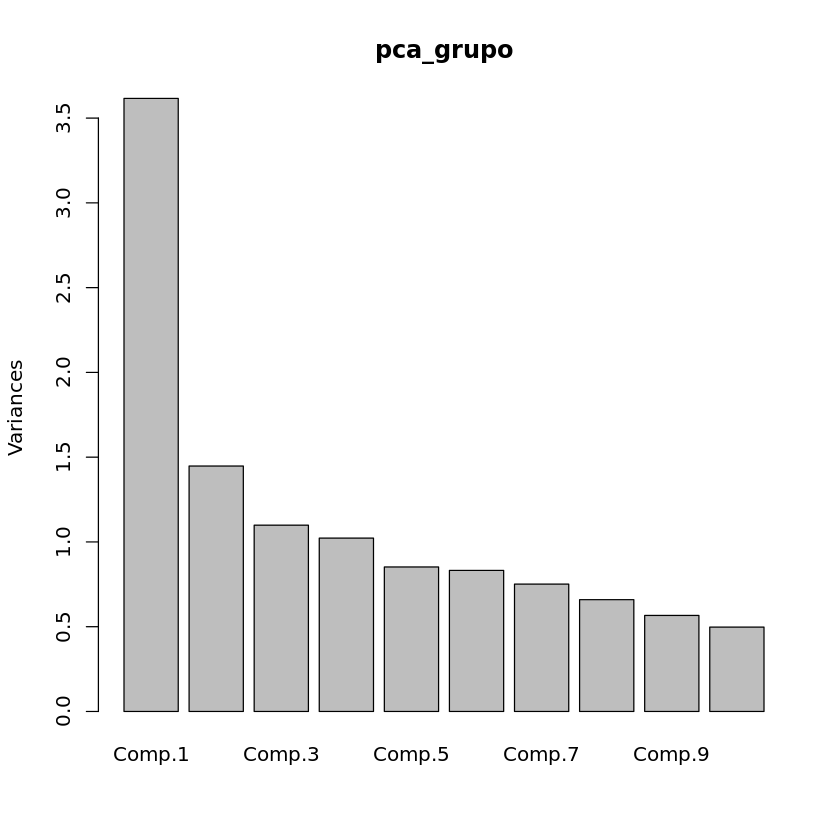

In [6]:
######
grupo <- cols_interesantes[comodidad ]
# Calculamos la matriz de correlaciones policorica 
# Clasificar columnas como ordinales

hcor = hetcor(grupo, std.err=FALSE)

#corrplot::corrplot(hcor$correlations, method="number")

#heatmap(hcor$correlations,main ="Comodidad")
#heatmap(hetcor(cols_interesantes[equipamiento_cols],std.err=FALSE)$correlations,main="Equipamiento")

#heatmap(hetcor(cols_interesantes[información_rutas],std.err=FALSE)$correlations,main="Informacion Rutas")
#jpeg(file="Infraestructura.jpeg")
#heatmap(hetcor(cols_interesantes[infraestructura],std.err=FALSE)$correlations,main="Infraestructura")
#dev.off()
#heatmap(hetcor(cols_interesantes[tiempo_sistema],std.err=FALSE)$correlations,main="Tiempo en Sistema")
#heatmap(hetcor(cols_interesantes[seguridad],std.err=FALSE)$correlations,main="Seguridad")
#heatmap(hetcor(cols_interesantes[precio],std.err=FALSE)$correlations,main="Precio")

pca_grupo <- princomp(  covmat = hcor$correlations )

scores <- data.matrix(grupo) %*% pca_grupo$loadings[,1:2]
#jpeg(file="security plot bi.jpeg")
#biplot(scores,pca_grupo$loadings[,1:2] )
#dev.off()

plot(pca_grupo)
summary(pca_grupo)

print(pca_grupo["loadings"], cutoff = 0.3)


## Análisis PCA para cada grupo.

Se filtra los componentes con varianza explicada menor a 1.

In [7]:
grupos <- list(precio = precio,seguridad = seguridad, comodidad = comodidad, infraestructura = infraestructura, informacion = informacion, equipamiento_cols = equipamiento_cols, tiempo_sistema = tiempo_sistema)

scores_df <- data.frame(temp = rep(0, 365))
loadings_list <- list()

for(i in 1:length(grupos)){
    grupo <- grupos[[i]]
    nombre_grupo <- names(grupos)[i]
    nuevo_grupo <- cols_interesantes[grupo]
    hcor = hetcor(nuevo_grupo, std.err=FALSE)
    pca_grupo <- princomp( covmat = hcor$correlations )
    loadings <- pca_grupo$loadings[,1:(sum(pca_grupo$sdev > 1)-1)]
    scores <- data.matrix(nuevo_grupo) %*% loadings
    scores <- data.frame(scores)
    colnames(scores) <- sapply(1:ncol(scores), function(x){ paste(nombre_grupo,".", x) })
    scores_df <- cbind(scores_df, scores)
}

scores_df <- scores_df[-1]
scores_df

precio . 1,seguridad . 1,comodidad . 1,comodidad . 2,comodidad . 3,infraestructura . 1,infraestructura . 2,informacion . 1,informacion . 2,equipamiento_cols . 1,tiempo_sistema . 1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.242641,5.022033,6.609506,-3.7411568,0.6995984,4.293956,-1.17928122,6.391455,-0.7875301,4.782453,3.79785028
2.121320,5.585349,8.290478,-4.3956383,0.4830262,4.929231,-0.35181284,9.627043,-0.9486334,3.995693,0.83829116
2.121320,3.988166,8.868575,-1.9399475,0.6000458,5.894537,-0.28566530,9.348759,-1.6354064,5.043741,1.11594465
4.242641,4.066472,7.155412,-0.9120014,-0.2147313,4.883108,-0.38334761,8.478655,-2.3517062,3.995693,2.18174505
4.242641,4.080934,9.562545,-5.0809678,1.6028877,6.431802,-0.69884528,9.291298,-2.9590053,5.043741,3.95709243
2.121320,6.038989,9.645284,-2.9334996,2.9225556,6.137024,0.27860052,9.252351,-2.7227139,4.785041,0.08000101
4.242641,5.022033,7.326253,-4.2426140,0.6514369,3.987549,0.64249222,5.454202,-1.9278584,5.043741,3.68930024
2.828427,4.501484,6.147446,-4.0537829,1.0827555,5.400937,0.84165036,6.138367,-0.7143015,2.929200,-0.67808008
4.242641,5.022033,6.169805,-4.1391832,1.1728671,6.038842,0.01223500,8.173575,-0.4206645,5.833089,2.82211159


In [8]:
#Agregar nombre a las columnas
colnames(scores_df) <- c("Percepción Precio", "Seguridad", "Limpieza", "Comodidad Buses", "Estaciones Flexibles", "Cobertura General", "Cobertura Específica", "Orientación", "Información Agil", "Servicios Varios", "Tiempo Sistema")
scores_df

Percepción Precio,Seguridad,Limpieza,Comodidad Buses,Estaciones Flexibles,Cobertura General,Cobertura Específica,Orientación,Información Agil,Servicios Varios,Tiempo Sistema
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.242641,5.022033,6.609506,-3.7411568,0.6995984,4.293956,-1.17928122,6.391455,-0.7875301,4.782453,3.79785028
2.121320,5.585349,8.290478,-4.3956383,0.4830262,4.929231,-0.35181284,9.627043,-0.9486334,3.995693,0.83829116
2.121320,3.988166,8.868575,-1.9399475,0.6000458,5.894537,-0.28566530,9.348759,-1.6354064,5.043741,1.11594465
4.242641,4.066472,7.155412,-0.9120014,-0.2147313,4.883108,-0.38334761,8.478655,-2.3517062,3.995693,2.18174505
4.242641,4.080934,9.562545,-5.0809678,1.6028877,6.431802,-0.69884528,9.291298,-2.9590053,5.043741,3.95709243
2.121320,6.038989,9.645284,-2.9334996,2.9225556,6.137024,0.27860052,9.252351,-2.7227139,4.785041,0.08000101
4.242641,5.022033,7.326253,-4.2426140,0.6514369,3.987549,0.64249222,5.454202,-1.9278584,5.043741,3.68930024
2.828427,4.501484,6.147446,-4.0537829,1.0827555,5.400937,0.84165036,6.138367,-0.7143015,2.929200,-0.67808008
4.242641,5.022033,6.169805,-4.1391832,1.1728671,6.038842,0.01223500,8.173575,-0.4206645,5.833089,2.82211159


## Ánalisis de factores basado en componentes principales cuya varianza explicada es mayor a uno

Factor Analysis using method =  ml
Call: fa(r = scores_df, nfactors = 5, rotate = "varimax", warnings = T, 
    fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                       ML2   ML3   ML1   ML4   ML5    h2    u2 com
Percepción Precio    -0.15  0.31 -0.11 -0.10  0.08 0.145 0.855 2.2
Seguridad             0.55 -0.24 -0.03  0.27 -0.24 0.494 0.506 2.3
Limpieza              0.91 -0.27 -0.23  0.15 -0.11 0.995 0.005 1.4
Comodidad Buses      -0.19  0.01  0.97  0.08  0.09 0.995 0.005 1.1
Estaciones Flexibles  0.02 -0.05  0.07  0.28  0.01 0.088 0.912 1.2
Cobertura General     0.32 -0.18 -0.18  0.73 -0.13 0.711 0.289 1.7
Cobertura Específica -0.22  0.03  0.05  0.05  0.35 0.176 0.824 1.8
Orientación           0.36 -0.36 -0.27  0.17 -0.20 0.397 0.603 3.9
Información Agil     -0.08  0.23  0.04  0.02  0.50 0.316 0.684 1.5
Servicios Varios     -0.01  0.14  0.00  0.16 -0.32 0.149 0.851 1.9
Tiempo Sistema       -0.19  0.82  0.12 -0.13 -0.04 0.749 0.251 1.2

   


Loadings:
                     ML2    ML3    ML1    ML4    ML5   
Percepción Precio    -0.148  0.305 -0.113              
Seguridad             0.553 -0.237         0.273 -0.237
Limpieza              0.914 -0.273 -0.227  0.150 -0.106
Comodidad Buses      -0.188         0.973              
Estaciones Flexibles                       0.284       
Cobertura General     0.321 -0.183 -0.179  0.726 -0.126
Cobertura Específica -0.215                       0.351
Orientación           0.360 -0.355 -0.267  0.172 -0.201
Información Agil             0.234                0.502
Servicios Varios             0.140         0.162 -0.321
Tiempo Sistema       -0.193  0.824  0.124 -0.128       

                 ML2   ML3   ML1   ML4   ML5
SS loadings    1.522 1.140 1.139 0.795 0.618
Proportion Var 0.138 0.104 0.104 0.072 0.056
Cumulative Var 0.138 0.242 0.346 0.418 0.474


[1] 2 3 1 4 5

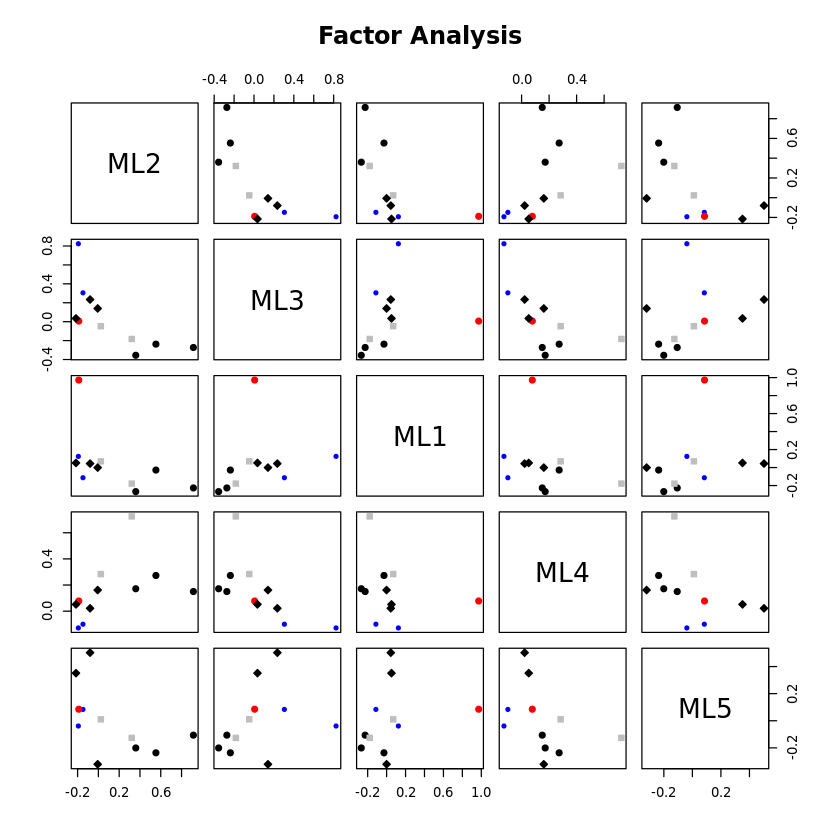

[1] 0.3614407

png 
  2

png 
  2

png 
  2

[1] 0.00208248

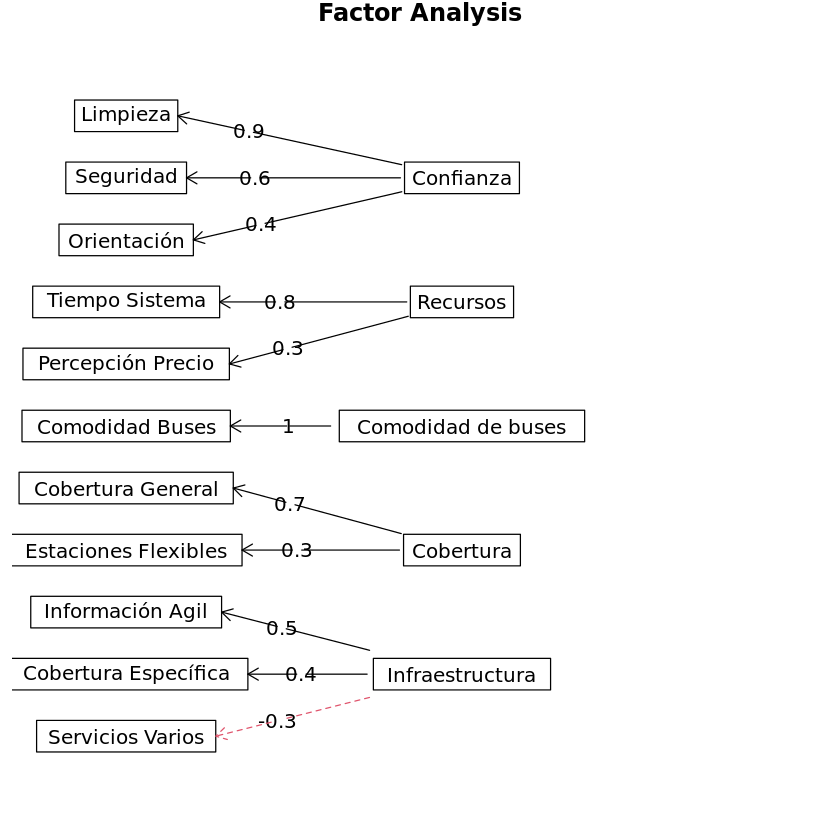

In [9]:
analisis.fa.3 <- fa(scores_df,
                      nfactors = 3,
                      fm = "ml",
                      rotate = "varimax", 
                      warnings = T)


analisis.fa <- fa(scores_df,
                      nfactors = 5,
                      fm = "ml",
                      rotate = "varimax", 
                      warnings = T)

analisis.fa.4 <- fa(scores_df,
                      nfactors = 4,
                      fm = "ml",
                      rotate = "varimax", 
                      warnings = T)

analisis.fa.6 <- fa(scores_df,
                      nfactors = 6,
                      fm = "ml",
                      rotate = "varimax", 
                      warnings = T)

analisis.fa
print(analisis.fa$loadings)
plot(analisis.fa)


c(2,3,1,4,5)

colnames(analisis.fa$loadings) <- c("Confianza", "Recursos", "Comodidad de buses", "Cobertura", "Infraestructura")
fa.diagram(analisis.fa, cut=0)


analisis.fa$PVAL
jpeg(file="BIC.jpeg")
plot(c(3,4,5), c(analisis.fa.3$BIC, analisis.fa.4$BIC, analisis.fa$BIC), type = "l", main = "BIC entre modelos",
                    xlab = "Número de factores",  ylab="BIC")
dev.off()
jpeg(file="RMS.jpeg")
plot(c(3,4,5,6), c(analisis.fa.3$rms, analisis.fa.4$rms, analisis.fa$rms, analisis.fa.6$rms),type = "l", main = "RMS entre modelos",
                    xlab = "Número de factores", ylab="RMS")
dev.off()
jpeg(file="TLI.jpeg")
plot(c(3,4,5,6), c(analisis.fa.3$TLI, analisis.fa.4$TLI, analisis.fa$TLI, analisis.fa.6$TLI), type = "l",main = "Tucker-Lewis entre modelos",
                    xlab = "Número de factores", ylab="TLI")
dev.off()
analisis.fa.4$PVAL


[1] 0.00208248

[1] 0.3614407

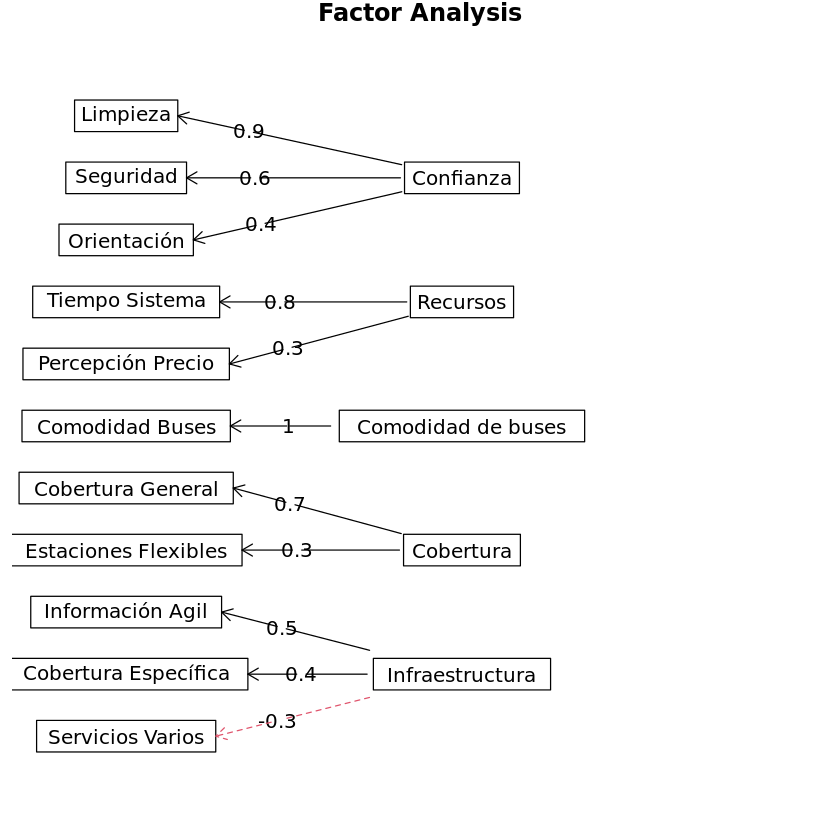

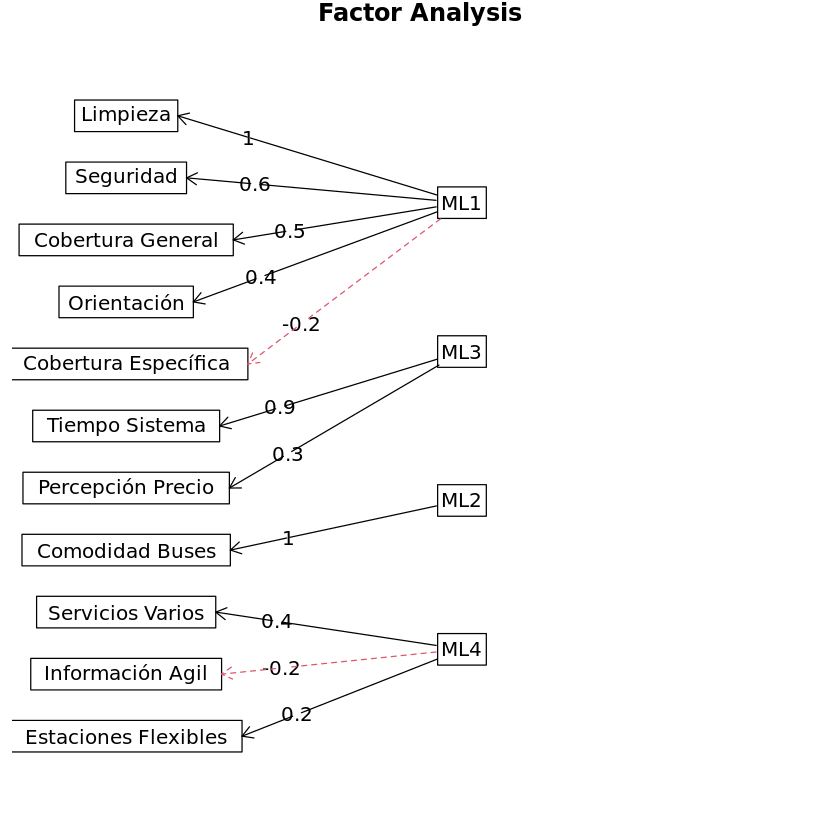

In [10]:
analisis.fa.4$PVAL
analisis.fa$PVAL
fa.diagram(analisis.fa, cut =0)
fa.diagram(analisis.fa.4, cut =0)


¿Que tan bien predicen estas variables latentes la satisfacción general?
Utilizaremos un modelo de random Forest para tratar de predecir esta variable
n = raiz de p 
10-fold Cross Validation


In [11]:
scores.fa <- factor.scores(scores_df,analisis.fa )$scores
scores.fa

Confianza,Recursos,Comodidad de buses,Cobertura,Infraestructura
0.02041677,1.632017836,0.13395723,-0.61300647,-0.26311886
0.23320474,-0.919320722,-0.64055946,-0.63590001,0.31266668
1.22066041,-0.784731054,2.43123228,0.27019265,0.08738369
0.61808795,-0.214475122,3.61559319,-0.26682017,-0.29316121
1.46740104,1.998905791,-1.19098753,0.24912470,-1.11914897
1.15391383,-1.479983780,1.24606727,0.50353067,-0.22303649
0.44931794,1.633585634,-0.35685274,-1.07374740,-0.13323380
-1.45991490,-1.995713954,-0.74471561,0.15844520,1.82445788
-0.90829833,0.996161933,-0.67066902,1.08669964,-0.08321257
0.31732733,0.131404021,-0.64023021,0.15989294,1.03088926


In [12]:
library(gbm)
library(randomForest)
library(pROC)

rf=randomForest(x=scores.fa , y = as.factor(encuestas$X1_Satisf_General))
rf


Loaded gbm 2.1.8

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var





Call:
 randomForest(x = scores.fa, y = as.factor(encuestas$X1_Satisf_General)) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 55.89%
Confusion matrix:
  1  2  3  4 5 class.error
1 3 20 19  3 0   0.9333333
2 6 41 49  2 0   0.5816327
3 2 31 94 24 0   0.3774834
4 0  2 43 23 0   0.6617647
5 0  1  0  2 0   1.0000000

,MeanDecreaseGini
Confianza,59.71428
Recursos,56.78813
Comodidad de buses,48.30878
Cobertura,48.70878
Infraestructura,43.50265


png 
  2

Warning message in roc.default(as.factor(encuestas$X1_Satisf_General), pred_rf[, :
“'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead”
Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.5088

ERROR: Error in ROC(pred_rf, as.factor(encuestas$X1_Satisf_General)): could not find function "ROC"


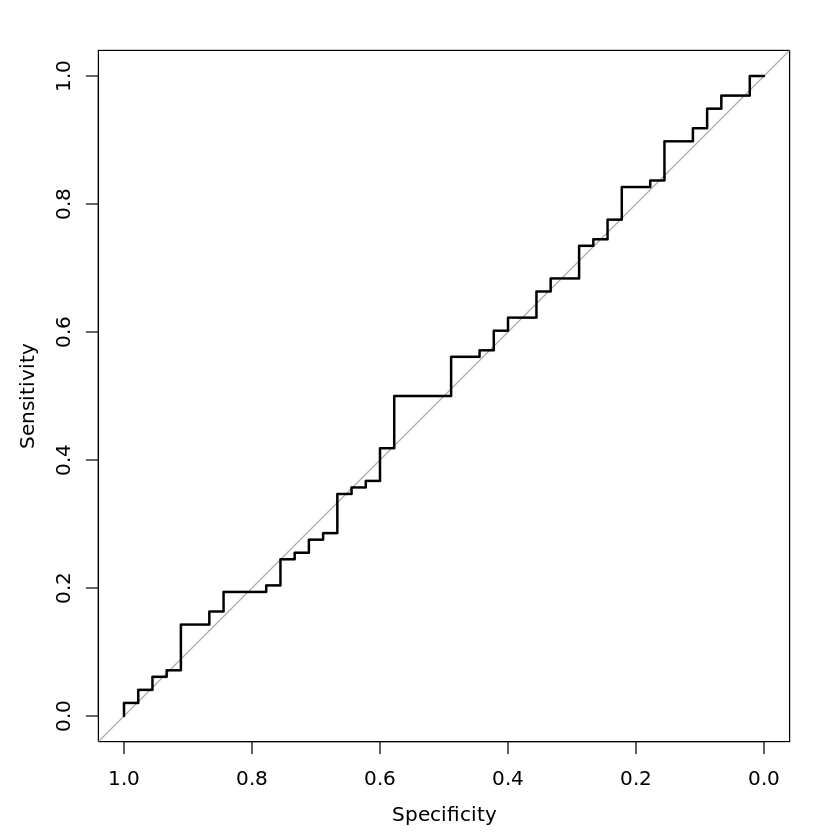

In [14]:
imp_rf=importance(rf)
imp_rf

jpeg(file="importancia.jpeg")
varImpPlot(rf)
dev.off()
pred_rf=predict(rf,type="prob")

roc_rf=roc(as.factor(encuestas$X1_Satisf_General),pred_rf[,2])
plot(roc_rf, xlim=c(1,0),ylim=c(0,1))
auc_rf=auc(roc_rf)
auc_rf
C<-ROC(pred_rf,as.factor(encuestas$X1_Satisf_General))
AUC(ROC(pred_rf,as.factor(encuestas$X1_Satisf_General)))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90c22cb4-3271-4024-9458-72997989e009' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>